In [1]:
%matplotlib inline
import numpy
from sklearn import datasets
import matplotlib.pyplot as plt

rng = numpy.random

In [2]:
learning_rate = 0.001
epochs = 10000

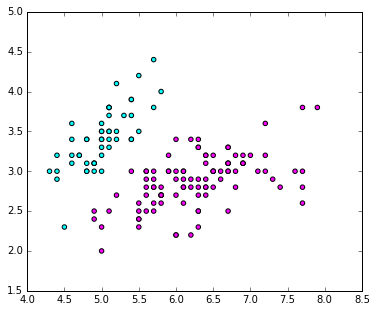

In [3]:
def loadDataset():
    dataset = datasets.load_iris()
    X = dataset['data']
    Z = dataset['target']
    X = X[:, :2]  # only look at 2 dimensions
    Z[Z == 2] = 1  # combine two of the 3 classes
    return numpy.array(X), numpy.array(Z)

X, Z = loadDataset()
assert X.shape[0] == Z.shape[0]
n_samples = len(X)

# Display
fig, ax = plt.subplots(1, 1, figsize=(6, 5))
ax.scatter(X[:,0], X[:,1], c=Z,
           cmap=plt.cm.cool)
plt.show()

In [4]:
def sigmoid(x):
    return 1.0 / (1.0 + numpy.exp(-x))

def loglikelihood(X, Z, W, b):
    Y = predict(X, W, b)
    assert Y.shape == Z.shape
    return numpy.dot(Z, numpy.log(Y)) + numpy.dot((1 - Z), numpy.log(1 - Y))

In [5]:
def predict(X, W, b):
    wx = numpy.dot(X, W.T)
    s = sigmoid(wx + b)
    s = s[:, 0]  # remove redundant dimension
    return s

def E(X, Z, W, b):
    return - loglikelihood(X, Z, W, b)

def gradient(X, Z, W, b):
    Y = predict(X, W, b)
    assert Y.shape == Z.shape
    dLdW = (numpy.dot(Z - Y, X))
    dLdb = (Z - Y).sum()
    return dLdW, dLdb

def train(X, Z, W, b):
    dLdW, dLdb = gradient(X, Z, W, b)
    W += learning_rate * dLdW
    b += learning_rate * dLdb
    return W, b

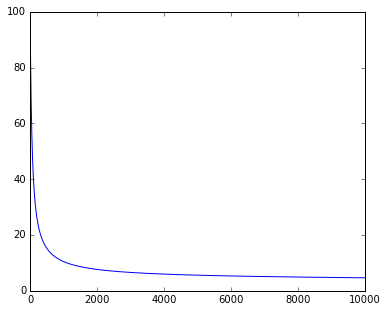

In [6]:
W = numpy.random.randn(1, 2) * 0.01
b = numpy.random.randn(1) * 0.01

train_loss = []
validation_loss = []

for _ in range(epochs):
    W, b = train(X, Z, W, b)
    train_loss.append(E(X, Z, W, b).mean())

f, ax = plt.subplots(figsize=(6, 5))
ax.plot(train_loss)
plt.show()

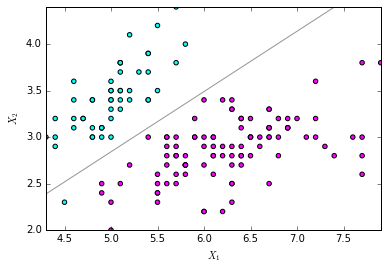

In [8]:
f, ax = plt.subplots(figsize=(6, 5))
# Training data
ax.scatter(X[:, 0], X[:, 1], c=Z,
           cmap=plt.cm.cool)
# Decision boundary
x0min, x0max = min(X[:, 0]), max(X[:, 0])
x1min, x1max = min(X[:, 1]), max(X[:, 1])
x0s, x1s = numpy.mgrid[x0min:x0max:.01, x1min:x1max:.01]
xs = numpy.c_[x0s.ravel(), x1s.ravel()]
ys = predict(xs, W, b)
ax.contour(x0s, x1s, ys.reshape(x0s.shape), levels=[.5], cmap="Greys",
           vmin=0, vmax=1
           )
# Plot
ax.set(aspect="equal",
       xlim=(x0min, x0max),
       ylim=(x1min, x1max),
       xlabel="$X_1$", ylabel="$X_2$")
plt.show()